<a href="https://colab.research.google.com/github/alhamedy/non-incentive-scenario/blob/main/Non_incentive_scenario%2C_attempt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration: 1
Node FNv-1: CPU utilization = 31.2%, Memory usage = 0.1%, Reputation value = 0, Decision = reject
Node FNv-2: CPU utilization = 30.6%, Memory usage = 19.5%, Reputation value = 1, Decision = reject
Node FNv-5: CPU utilization = 57.2%, Memory usage = 57.7%, Reputation value = 6, Decision = accept
Node FNv-6: CPU utilization = 0.0%, Memory usage = 8.8%, Reputation value = 3, Decision = reject
Node FNv-7: CPU utilization = 0.0%, Memory usage = 12.7%, Reputation value = 4, Decision = accept
Node FNv-8: CPU utilization = 47.5%, Memory usage = 50.4%, Reputation value = 5, Decision = accept
Node FNv-10: CPU utilization = 0.0%, Memory usage = 12.1%, Reputation value = 6, Decision = accept
Node FNv-12: CPU utilization = 1.0%, Memory usage = 7.3%, Reputation value = 0, Decision = reject
Node FNv-13: CPU utilization = 0.0%, Memory usage = 18.6%, Reputation value = 1, Decision = reject
Node FNv-14: CPU utilization = 0.0%, Memory usage = 8.1%, Reputation value = 2, Decision = reject
Nod

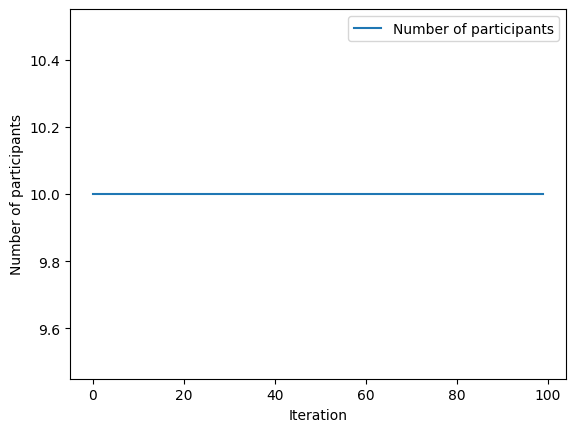

In [ ]:
import random
import matplotlib.pyplot as plt
import pandas as pd

num_followers = 20
min_reputation = 0
max_reputation = 6
optimal_participants = 17
max_iterations = 100

# Read the dataset file
dataset_file = "/content/Dataset for incentive-20 nodes.csv"
df = pd.read_csv(dataset_file)

# Extract columns from the dataset
follower_ids = df["Node-ID"].tolist()
cpu_utilization = df["CPU-Utilization"].tolist()
memory_usage = df["Memory-Usage"].tolist()
reputation_scores = df["Reputation value"].tolist()

# Initialize the number of participants to 0 and create empty lists to store the results
num_participants = 0
num_accepts = []
behaviors = []
participation_levels = []  # New list to store the level of participation

# Loop until the optimal number of participants is reached or the maximum number of iterations is reached
for iteration in range(max_iterations):
    behaviors = []
    print(f"Iteration: {iteration + 1}")

    for j in range(num_followers):
        follower_id = follower_ids[j]
        reputation = reputation_scores[j]

        if 4 <= reputation <= 6:
            behaviors.append("accept")
        else:
            behaviors.append("reject")

        print(f"Node {follower_id}: CPU utilization = {cpu_utilization[j]}%, Memory usage = {memory_usage[j]}%, "
              f"Reputation value = {reputation}, Decision = {behaviors[j]}")

    # Count the number of followers who accept the job
    num_accept = behaviors.count("accept")
    participation = num_accept / optimal_participants * 100  # Calculate the level of participation
    participation_levels.append(participation)  # Add the level of participation to the list
    print(f"Level of participation: {participation:.2f}%")  # Print the level of participation
    print("----------------------------------------------")

    # Append the results to the corresponding lists
    num_accepts.append(num_accept)

    # Update the number of participants if the optimal number of participants is reached
    if num_accept == optimal_participants:
        num_participants = num_accept
        print(f"Optimal participants reached: {num_accept}")
        break
    elif num_participants < num_accept:
        num_participants = num_accept

# Print the results
if num_participants == optimal_participants:
    print(f"Optimal participants: {num_participants}")
else:
    print(f"Highest number of participants: {num_participants}")

# Print CPU utilization, memory usage, and reputation score of participating nodes
print("CPU Utilization, Memory Usage, and Reputation of Participating Nodes:")
for j in range(num_followers):
    if behaviors[j] == "accept":
        follower_id = follower_ids[j]
        print(f"Node {follower_id}: CPU = {cpu_utilization[j]}%, Memory = {memory_usage[j]}%, "
              f"Reputation = {reputation_scores[j]}")
print(f"Level of participation: {participation:.2f}%")

fig, ax = plt.subplots()
ax.plot(range(len(num_accepts)), num_accepts, label="Number of participants")
ax.set_xlabel("Iteration")
ax.set_ylabel("Number of participants")
ax.legend()
plt.show()
